In [1]:
!pip install --upgrade xlrd
!pip install pydot
!pip install graphviz

LINK to Datasets: https://drive.google.com/drive/folders/19KN8KsbJ-MzwAiQqwm5vH47XM4A24QNp?usp=sharing 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import itertools
from ipywidgets import interact, interactive
#import geopandas as gpd
import hashlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import pearsonr
import re

sns.set(style="dark")
plt.style.use("ggplot")
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounting drive.

In [3]:
# from google.colab import files
# data_to_load = files.upload()

#make sure to run this cell first
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA
• Visualize at least two quantitative variables and two categorical variables. Your visualizations
must be relevant to your research questions!

• Describe any trends you observe, and any relationships you may want to follow up on.

• Describe any data cleaning steps you took. How will these decisions impact your models and
inferences?

• Explain how your visualizations should be relevant to your research questions: either by moti-
vating the question, or suggesting a potential answer. You must explain why they are relevant.

In [4]:
copd = pd.read_csv("/content/drive/MyDrive/Data C102 final project/data/U.S._Chronic_Disease_Indicators__Chronic_Obstructive_Pulmonary_Disease.csv")
copd.head()
print(len(copd))
#if this cell doesn't run, "add shortcut to drive" will let you access this file (proj folder > right click > add shortcut)

142704


In [5]:
copd

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,AK,Alaska,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,NaN,"cases per 100,000",Age-adjusted Rate,...,2,COPD,COPD1_2,AGEADJRATE,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2015,2015,AK,Alaska,CMS Part A Claims Data,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,NaN,"cases per 1,000",Age-adjusted Rate,...,2,COPD,COPD5_4,AGEADJRATE,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2011,2011,AL,Alabama,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,NaN,"cases per 100,000",Crude Rate,...,1,COPD,COPD1_1,CRDRATE,RACE,WHT,NaN,NaN,NaN,NaN
3,2017,2017,AL,Alabama,SEDD; SID,Chronic Obstructive Pulmonary Disease,Emergency department visit rate for chronic ob...,NaN,NaN,Number,...,1,COPD,COPD6_2,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2017,2017,AR,Arkansas,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,NaN,"cases per 100,000",Crude Rate,...,5,COPD,COPD1_1,CRDRATE,GENDER,GENM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142699,2020,2020,VT,Vermont,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,...,50,COPD,COPD2_0_1,AGEADJPREV,RACE,HIS,NaN,NaN,NaN,NaN
142700,2020,2020,VT,Vermont,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,NaN,%,Crude Prevalence,...,50,COPD,COPD3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
142701,2020,2020,WI,Wisconsin,BRFSS,Chronic Obstructive Pulmonary Disease,Pneumococcal vaccination among noninstitutiona...,NaN,%,Age-adjusted Prevalence,...,55,COPD,COPD8_0,AGEADJPREV,RACE,HIS,NaN,NaN,NaN,NaN
142702,2020,2020,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,NaN,%,Age-adjusted Prevalence,...,54,COPD,COPD3_0_1,AGEADJPREV,RACE,WHT,NaN,NaN,NaN,NaN


In [6]:
copd.dropna()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3


COPD Data Cleaning Steps

In [7]:
#dropped meaningless columns
na_columns = ["Response","StratificationCategory2","Stratification2","StratificationCategory3","Stratification3","ResponseID","StratificationCategoryID2","StratificationID2","StratificationCategoryID3","StratificationID3"]
copd = copd.drop(na_columns, axis=1)

I have dropped columns with NA values which does not impact my model and inferences because they are meaningless columns. 

In [8]:
copd.describe()

,YearStart,YearEnd,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,LocationID
count,142704.000000,142704.000000,8.764600e+04,8.764600e+04,70581.000000,70581.000000,142704.000000
mean,2014.961466,2014.961466,3.404611e+03,3.404611e+03,73.001714,87.850492,30.752649
std,2.736374,2.736374,4.515502e+04,4.515502e+04,102.780736,110.380606,17.470737
min,2010.000000,2010.000000,0.000000e+00,0.000000e+00,0.210000,0.440000,1.000000
25%,2013.000000,2013.000000,2.908250e+01,2.908250e+01,13.880000,20.530000,17.000000
50%,2015.000000,2015.000000,6.050000e+01,6.050000e+01,42.600000,59.900000,30.000000
75%,2017.000000,2017.000000,1.710000e+02,1.710000e+02,78.990000,91.850000,44.250000
max,2020.000000,2020.000000,2.925456e+06,2.925456e+06,1550.750000,1626.660000,78.000000


In [9]:
copd['Question'].unique()

array(['Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years',
       'Hospitalization for chronic obstructive pulmonary disease as any diagnosis among Medicare-eligible persons aged >= 65 years',
       'Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years',
       'Emergency department visit rate for chronic obstructive pulmonary disease as any diagnosis',
       'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis among Medicare-eligible persons aged >= 65 years',
       'Hospitalization for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Hospitalization for chronic obstructive pulmonary disease as any diagnosis',
       'Emergency department visit rate for chronic obstructive pulmonary disease as first-listed diagnosis',
       'Prevalence of chronic obstructive pulmonary disease among adults >= 18',
       'Pn

Since we are interested in the 'Prevalence of chronic obstructive pulmonary disease among adults >= 18'
filtered the dataframe that only contains this question.

In [10]:
copd_question = copd[copd['Question']=='Prevalence of chronic obstructive pulmonary disease among adults >= 18']
copd_question.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
79680,2016,2016,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Crude Prevalence,7.0,...,3.9,12.2,Race/Ethnicity,"Other, non-Hispanic",2,COPD,COPD2_0,CRDPREV,RACE,OTH
79704,2018,2018,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,5.1,...,3.9,6.8,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM
79714,2015,2015,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Crude Prevalence,4.9,...,2.8,8.7,Race/Ethnicity,"Other, non-Hispanic",2,COPD,COPD2_0,CRDPREV,RACE,OTH
79723,2012,2012,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.0,...,4.8,7.4,Gender,Female,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENF
79734,2011,2011,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.8,...,5.2,8.9,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM


In [11]:
copd_question.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

In [12]:
select_columns = ['YearEnd',"LocationAbbr",'DataValue','Stratification1']
selected_copd_question = copd_question[select_columns]
selected_copd_question.head()


,YearEnd,LocationAbbr,DataValue,Stratification1
79680,2016,AK,7.0,"Other, non-Hispanic"
79704,2018,AK,5.1,Male
79714,2015,AK,4.9,"Other, non-Hispanic"
79723,2012,AK,6.0,Female
79734,2011,AK,6.8,Male


By observing the columns, our dataframe ended up with ['YearEnd',"LocationAbbr",'DataValue','Stratification1'] these columns since our model is interested whether the air quality affects the prevalance of chronic obstructive pulmonary disease.

## Data Visualization 1: Does smoking affects prevalance of COPD?

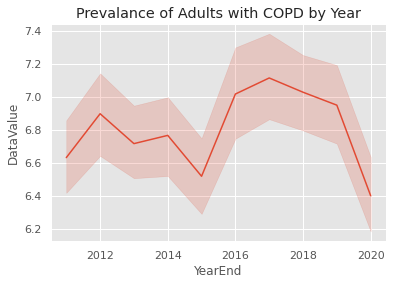

In [13]:
sns.lineplot(data = selected_copd_question, x= "YearEnd", y = "DataValue").set(title = "Prevalance of Adults with COPD by Year");

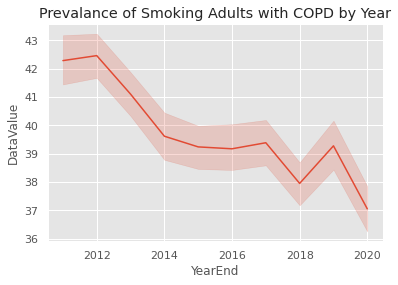

In [14]:
smoking_copd = copd[copd['Question']=='Prevalence of current smoking among adults >= 18 with diagnosed chronic obstructive pulmonary disease']
sns.lineplot(data = smoking_copd, x= "YearEnd", y = "DataValue").set(title = "Prevalance of Smoking Adults with COPD by Year");

#### Trends
We have observed how 'Prevalence of chronic obstructive pulmonary disease among adults >= 18' and 'Prevalence of current smoking among adults >= 18 with diagnosed chronic obstructive pulmonary disease' differs by year.
It seems like both of the line plots are showing that the prevalence is gradually decreasing over several years. Suprising fact is that while the lowest average prevalence value is around 6.4% in 2020, the value for the smoking adults was 37% around 2020. This implies that smoking is a significant factor that causes COPD among adults.

#### Data Cleaning
Since our research question is interested in the prevalence of COPD among adults we have filtered out the rows that only contain this information. 

#### Relevance
I could use this implication to use smoking as a confounding factor for research question 1 since smoking both affects the prevalence of COPD among adults and the air quality. Also, 
It can act as our predictor for research question 2 since the smoking variable significantly affects the prevalence of COPD proven by the visualization.

## Data visualization 2: visualize how prevalance differs by race and gender (do they work as a predictor column for research question 2)

In [15]:
g_copd_question = copd_question[copd_question['StratificationCategory1']=="Gender"]
r_copd_question = copd_question[copd_question['StratificationCategory1']== "Race/Ethnicity"]
g_copd_question.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
79704,2018,2018,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,5.1,...,3.9,6.8,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM
79723,2012,2012,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.0,...,4.8,7.4,Gender,Female,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENF
79734,2011,2011,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.8,...,5.2,8.9,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM
79740,2016,2016,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,5.5,...,3.8,7.8,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM
79757,2014,2014,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.0,...,4.8,7.5,Gender,Female,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENF


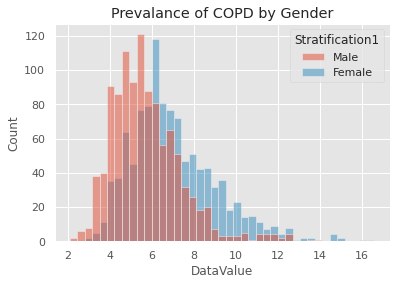

In [16]:
sns.histplot(data = g_copd_question, x= "DataValue", hue = "Stratification1").set(title = "Prevalance of COPD by Gender");

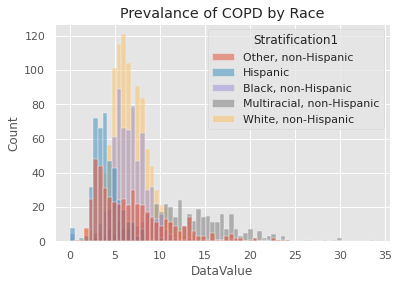

In [17]:
sns.histplot(data = r_copd_question, x= "DataValue", hue = "Stratification1").set(title = "Prevalance of COPD by Race");

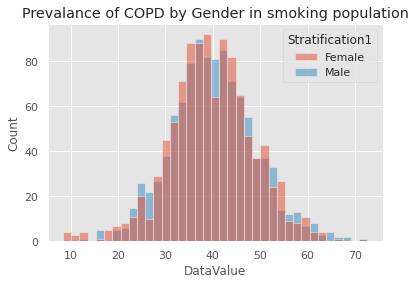

In [18]:
smoking_copd_g = smoking_copd[smoking_copd['StratificationCategory1']=="Gender"]
sns.histplot(data = smoking_copd_g, x= "DataValue", hue = "Stratification1").set(title = "Prevalance of COPD by Gender in smoking population");

Smoking is does not seem to be the critical factor that makes the difference in distribution of Prevalence of CPD by race. On distribution of Prevalence of COPD by gender, Female tends to have high prevelance of COPD.

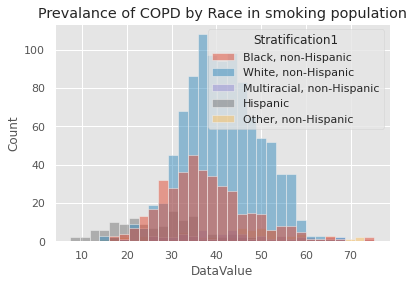

In [19]:
smoking_copd_r = smoking_copd[smoking_copd['StratificationCategory1']=="Race/Ethnicity"]
sns.histplot(data = smoking_copd_r, x= "DataValue", hue = "Stratification1").set(title = "Prevalance of COPD by Race in smoking population");

The sample sizes of each race has a huge difference. We should address the difference in the sample size when analyze the data

#### Trends
Prevalence of COPD by Gender: It seems like the distribution of male's prevalence is located on the left of the distribution of female's prevalence which implies that the average of males' prevalence is lower than females'. We could assume that females might have more probability to get diagnosed with COPD.
Prevalence of COPD by Race: It seems like the distribution of hispanic has relatively lower prevalence than black and white. Also it seems like the distribution of white and black follows the similar distribution. Multiracial, non-hispanic people seem to have relatively higher prevalence than other races.
Prevalence of COPD by Gender in Smoking Population: Among smoking adults, Gender does not seem to be the critical factor that differentiates in the distribution of prevalence of COPD.
Prevalence of COPD by Race in Smoking Population: Among smoking adults, it also seems like the distribution of hispanic has relatively lower prevalence than other races.  
#### Relevance
Since it seems like the distribution of prevalence rate differences by both race and gender, we could use these stratification factors as predictors to predict whether people have chronic disease. 
Since it seems like the distribution of prevalence among smoking adults seem to have non-outstanding variables that are helpful to predict the prevalence of COPD, it gives us certainty to stick with the prevalence of COPD among the combined population instead of the smoking population. 


# Ozone_Concentration Data set

In [20]:
ozone = pd.read_csv("/content/drive/MyDrive/Data C102 final project/data/Daily_Census_Tract-Level_Ozone_Concentrations__2011-2014.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
ozone = pd.read_csv("/content/drive/MyDrive/Data C102 final project/data/Daily_Census_Tract-Level_Ozone_Concentrations__2011-2014.csv", nrows = 5000000)

In [22]:
ozone.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_o3_pred,ds_o3_stdd
0,2011,22APR2011,53,53063,53063011800,47.66531,-117.22963,43.917166,4.850092
1,2011,22APR2011,53,53063,53063011900,47.66565,-117.25063,43.834730,4.806781
2,2011,22APR2011,53,53063,53063012000,47.66586,-117.27194,43.842599,5.034627
3,2011,22APR2011,53,53063,53063012100,47.66418,-117.29271,43.817001,4.892534
4,2011,22APR2011,53,53063,53063012200,47.67230,-117.32219,43.781775,4.941846


In [23]:
#ozone['year'].unique()
print(ozone['year'].value_counts())
ozone.tail(10)

2011    5000000
Name: year, dtype: int64


,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_o3_pred,ds_o3_stdd
4999990,2011,01JUL2011,6,6083,6083002102,34.94211,-120.42678,37.920842,4.002717
4999991,2011,01JUL2011,6,6083,6083002103,34.93073,-120.42716,38.043964,4.110017
4999992,2011,01JUL2011,6,6083,6083002205,34.96387,-120.42807,38.328317,4.035286
4999993,2011,01JUL2011,6,6083,6083002206,34.95672,-120.42660,38.134090,3.997058
4999994,2011,01JUL2011,6,6083,6083002209,34.97296,-120.43075,38.745930,4.083786
4999995,2011,01JUL2011,6,6083,6083002210,34.97071,-120.41872,38.858201,4.173939
4999996,2011,01JUL2011,6,6083,6083002211,34.95353,-120.39211,39.729095,4.275056
4999997,2011,01JUL2011,6,6083,6083002303,34.96414,-120.44455,37.927351,4.054867
4999998,2011,01JUL2011,6,6083,6083002304,34.95688,-120.44464,37.852424,3.976815
4999999,2011,01JUL2011,6,6083,6083002305,34.97141,-120.44447,38.230959,4.060369


Last 5 rows are missing/error data. Drop them

In [24]:
ozone = ozone.dropna(0)
ozone.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_o3_pred,ds_o3_stdd
4999995,2011,01JUL2011,6,6083,6083002210,34.97071,-120.41872,38.858201,4.173939
4999996,2011,01JUL2011,6,6083,6083002211,34.95353,-120.39211,39.729095,4.275056
4999997,2011,01JUL2011,6,6083,6083002303,34.96414,-120.44455,37.927351,4.054867
4999998,2011,01JUL2011,6,6083,6083002304,34.95688,-120.44464,37.852424,3.976815
4999999,2011,01JUL2011,6,6083,6083002305,34.97141,-120.44447,38.230959,4.060369


## data cleaning: map statefips to statesabb

I have mapped states_codoes with state abbreviations to add column to both ozone and pm2.5 dataset in order to merge with COPD dataset. 

In [25]:
state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}
state_codes = dict(zip(state_codes.values(), state_codes.keys()))
state_codes = {int(k):v for k,v in state_codes.items()}
#state_codes

In [26]:
ozone['statefips'] = ozone['statefips'].fillna(0)
ozone['statefips'] = ozone['statefips'].astype('int')
ozone['stateAbbr'] = ozone['statefips'].map(state_codes)

ozone['countyfips'] = ozone['countyfips'].fillna(0)
ozone['countyfips'] = ozone['countyfips'].astype('int')
ozone.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_o3_pred,ds_o3_stdd,stateAbbr
0,2011,22APR2011,53,53063,53063011800,47.66531,-117.22963,43.917166,4.850092,WA
1,2011,22APR2011,53,53063,53063011900,47.66565,-117.25063,43.834730,4.806781,WA
2,2011,22APR2011,53,53063,53063012000,47.66586,-117.27194,43.842599,5.034627,WA
3,2011,22APR2011,53,53063,53063012100,47.66418,-117.29271,43.817001,4.892534,WA
4,2011,22APR2011,53,53063,53063012200,47.67230,-117.32219,43.781775,4.941846,WA


1. 5 states with the highest ozone concentration
2. 5 states with the lowest ozone concentration

3. plot a histogram for all ozone concentration

In [27]:
ozone_top_5 = ozone.groupby("stateAbbr")["ds_o3_pred"].mean().sort_values(ascending = False).head(5)
ozone_top_5

stateAbbr
AZ    57.935195
NV    57.610170
CO    54.878342
NM    54.458591
MD    52.529497
Name: ds_o3_pred, dtype: float64

In [28]:
ozone_bottom_5 = ozone.groupby("stateAbbr")["ds_o3_pred"].mean().sort_values().head(5)
ozone_bottom_5

stateAbbr
ME    35.766054
WA    36.310798
OR    37.413729
VT    39.273578
NH    40.030732
Name: ds_o3_pred, dtype: float64

Text(0.5, 1.0, 'Distribution of Ozone Concentration')

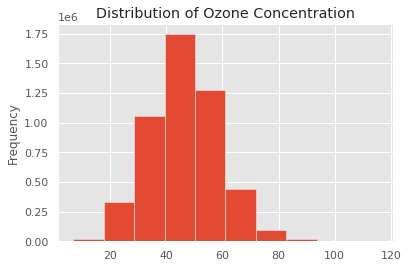

In [29]:
ozone['ds_o3_pred'].plot.hist()
plt.title("Distribution of Ozone Concentration")

It seems like the Ozone concentration distribution follows a unimodal normal distribution centered around 30-40.

Ozone concentration by countyfips

In [30]:
grouped_ozone = ozone.groupby('countyfips').mean()
grouped_ozone.head()

,year,statefips,ctfips,latitude,longitude,ds_o3_pred,ds_o3_stdd
countyfips,,,,,,,
1001,2011.0,1.0,1.001021e+09,32.490296,-86.521727,46.083112,5.219239
1003,2011.0,1.0,1.003011e+09,30.556509,-87.755912,44.451387,4.755211
1005,2011.0,1.0,1.005950e+09,31.865908,-85.330689,47.255563,5.853840
1007,2011.0,1.0,1.007010e+09,33.042010,-87.139075,44.698814,4.921414
1009,2011.0,1.0,1.009050e+09,33.969439,-86.588903,48.976867,5.049191


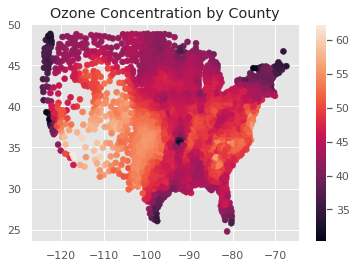

In [31]:
plt.scatter(x=grouped_ozone['longitude'], y=grouped_ozone['latitude'], c= grouped_ozone['ds_o3_pred'])
plt.title('Ozone Concentration by County')
plt.colorbar()
plt.show()

#### Explanation: 
The higher the ozone concentration the more pollution, which seems like Colorado (CO), New Mexico (NM), Utah (UT), Arizona (AZ), Nevada (NV) area has high ozone concentration. 

I have implemented this visualization to check what geographical area has low air quality since it relates to both research question 1 and 2. 

Geographical region can act as an instrumental variable since it affects the air quality but not directly affects the prevalance of COPD. I chould also check if the prevalance of COPD is also high in these areas using the COPD dataset.
Also it could act as a predictor for research question 2 by creating dummy variable of each state since we could find air quality differs by states.

# PM 2.5_Concentration Data set

In [32]:
#pmcon = pd.read_csv("/content/drive/MyDrive/Data C102 final project/data/Daily_Census_Tract-Level_PM2.5_Concentrations__2011-2014.csv")

In [33]:
#my notebook crashed while running first line; had to only take 5M rows
pmcon = pd.read_csv("/content/drive/MyDrive/Data C102 final project/data/Daily_Census_Tract-Level_PM2.5_Concentrations__2011-2014.csv", nrows = 5000000)

In [34]:
pmcon.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd
0,2011,24MAY2011,44,44007,44007011600,41.91047,-71.45740,17.140095,2.291852
1,2011,24MAY2011,44,44007,44007011701,41.90844,-71.41556,17.198491,2.195946
2,2011,24MAY2011,44,44007,44007011702,41.89193,-71.42560,17.353419,2.153858
3,2011,24MAY2011,44,44007,44007011800,41.86903,-71.42897,17.618018,2.157761
4,2011,24MAY2011,44,44007,44007011901,41.86059,-71.44743,17.499644,2.182376


In [35]:
state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}
state_codes = dict(zip(state_codes.values(), state_codes.keys()))
state_codes = {int(k):v for k,v in state_codes.items()}
#state_codes

In [36]:
pmcon['statefips'] = pmcon['statefips'].fillna(0)
pmcon['statefips'] = pmcon['statefips'].astype('int')
pmcon['stateAbbr'] = pmcon['statefips'].map(state_codes)
pmcon.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,ds_pm_pred,ds_pm_stdd,stateAbbr
0,2011,24MAY2011,44,44007,44007011600,41.91047,-71.45740,17.140095,2.291852,RI
1,2011,24MAY2011,44,44007,44007011701,41.90844,-71.41556,17.198491,2.195946,RI
2,2011,24MAY2011,44,44007,44007011702,41.89193,-71.42560,17.353419,2.153858,RI
3,2011,24MAY2011,44,44007,44007011800,41.86903,-71.42897,17.618018,2.157761,RI
4,2011,24MAY2011,44,44007,44007011901,41.86059,-71.44743,17.499644,2.182376,RI


1. 5 states with the highest PM 2.5 concentration
2. 5 states with the lowest PM 2.5 concentration

3. plot a histogram for all PM 2.5 concentration

In [37]:
pmcon_top_5 = pmcon.groupby("stateAbbr")["ds_pm_pred"].mean().sort_values(ascending = False).head(5)
pmcon_top_5

stateAbbr
DC    14.933828
GA    14.544801
MD    14.389360
OH    14.349259
KY    14.267913
Name: ds_pm_pred, dtype: float64

In [38]:
pmcon_bottom_5 = pmcon.groupby("stateAbbr")["ds_pm_pred"].mean().sort_values().head(5)
pmcon_bottom_5

stateAbbr
MT    5.623760
WA    6.065095
WY    6.117382
UT    6.139391
ID    6.448226
Name: ds_pm_pred, dtype: float64

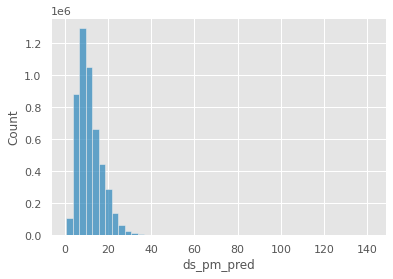

In [39]:
sns.histplot(data = pmcon, x ="ds_pm_pred", binwidth = 3);
#pmcon['ds_pm_pred'].plot.hist()

In [40]:
pmcon[pmcon['ds_pm_pred']>=40]['year'].value_counts()

2011    5034
Name: year, dtype: int64

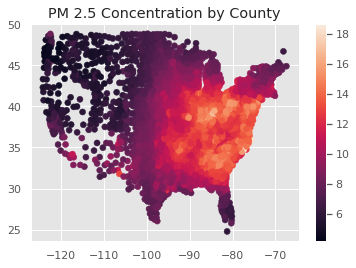

In [41]:
grouped_pmcon = pmcon.groupby('countyfips').mean()
plt.scatter(x=grouped_pmcon['longitude'], y=grouped_pmcon['latitude'], c= grouped_pmcon['ds_pm_pred'])
plt.title("PM 2.5 Concentration by County")
plt.colorbar()
plt.show()

It seems like year 2014 contains the most number of pm2.5 concentration that is higher than 40 while the data visualization doesn't consider these factors which is just averaging the value of PM 2.5 concentration for the entire year.

According to this visualization it shows that Illinois, Indiana area has high PM 2.5 concentration.

## Data Visualization 3

In [42]:
copd_question_ageadj = copd_question[copd_question['DataValueTypeID'] == 'AGEADJPREV']

In [43]:
#COPD Age Adjusted Prevalence Geomap 
state_prev = copd_question_ageadj[['LocationAbbr','DataValue']].groupby('LocationAbbr').mean().reset_index()

fig = go.Figure(data=go.Choropleth(
    locations=state_prev['LocationAbbr'], # Spatial coordinates
    z = state_prev['DataValue'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Age Adjusted Prevalence %",
))
fig.update_layout(
    title_text = 'Age Adjusted Prevalence by State',
    geo_scope='usa', # limit map scope to USA
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

In [44]:
#Pm2.5 geomap
pm_conc_states = pmcon[['stateAbbr','ds_pm_pred']].groupby('stateAbbr').mean().reset_index()

fig = go.Figure(data=go.Choropleth(
    locations= pm_conc_states['stateAbbr'], # Spatial coordinates
    z = pm_conc_states['ds_pm_pred'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "average PM2.5 concentration in μg/m3",
    
))
fig.update_layout(
    title_text = 'Mean estimated 24-hour average PM2.5 concentration in μg/m3 by States',
    geo_scope='usa', # limit map scope to USA
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

In [45]:
#Ozone geomap
ozone_states = ozone[['stateAbbr','ds_o3_pred']].groupby('stateAbbr').mean().reset_index()

fig = go.Figure(data=go.Choropleth(
    locations= ozone_states['stateAbbr'], # Spatial coordinates
    z = ozone_states['ds_o3_pred'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "ozone ppb",
    
))
fig.update_layout(
    title_text = 'Mean estimated 8-hour ozone ppb by States',
    geo_scope='usa', # limit map scope to USA
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

**Trend**

These color coded geomaps show how age adjusted prevalence rate of COPD, ozone concentration, and pm 2.5 concentration differs by states. By looking at geomaps of COPD prevalence rate and pm 2.5 concentration, we could observe that regions with high pm 2.5 concentration (Kentucky, West Virginia, etc) also tend to have high COPD prevalence rate. This indicates that there exists some relationship between pm 2.5 and COPD rate; we aim to define this relationship using causal inference technique. It was interesting to see that regions with higher ozone concentration (Nevada, Arizona, etc.) did not necessarily have higher COPD rate. 

**Data cleaning**

Since the granularity of COPD data is in each states, we grouped ozone & pm 2.5 table by states as well, by taking the mean. During the process, ozone & pm 2.5 data could have lost some information. For instance, while taking the mean, we could have accidentally included outliers. 

**Relevance**

This is relevant to our research question regarding the relationship between air pollutant and age adjusted prevalence rate of COPD. The visualization clearly shows that states with higher pm 2.5 have higher COPD rate. 


## Data Visualization 4

In [46]:
pmcon_year = pmcon[['stateAbbr','ds_pm_pred']].groupby('stateAbbr').mean().reset_index()
ozone_year = ozone[['stateAbbr','ds_o3_pred']].groupby('stateAbbr').mean().reset_index()
bad_air_state = ozone_year.merge(pmcon_year, how = 'inner', on = ['stateAbbr']).sort_values(by = ['ds_pm_pred', 'ds_o3_pred'], ascending = False).head(5)
good_air_state = ozone_year.merge(pmcon_year, how = 'inner', on = ['stateAbbr']).sort_values(by = ['ds_pm_pred', 'ds_o3_pred'], ascending = True).head(5)


In [47]:
bad_air_state

,stateAbbr,ds_o3_pred,ds_pm_pred
6,DC,52.189031,14.933828
9,GA,51.262334,14.544801
18,MD,52.529497,14.389360
33,OH,46.783096,14.349259
15,KY,48.223442,14.267913


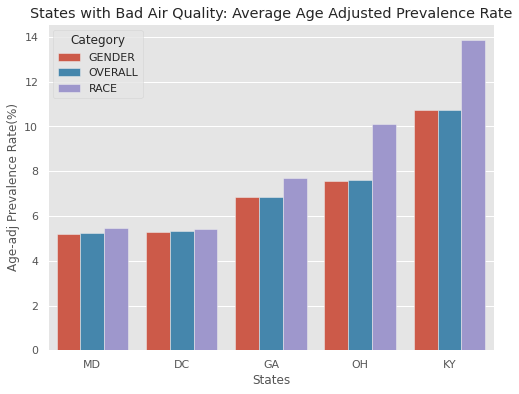

In [48]:
plt.figure(figsize=(8, 6))
copdStates = copd_question_ageadj[['LocationAbbr','DataValue','StratificationCategoryID1']].groupby(['LocationAbbr','StratificationCategoryID1']).mean().reset_index()
bad_air_copd = copdStates[copdStates['LocationAbbr'].isin(bad_air_state['stateAbbr'].to_list())]
good_air_copd = copdStates[copdStates['LocationAbbr'].isin(good_air_state['stateAbbr'].to_list())]
sns.barplot(x="States", y="Age-adj Prevalence Rate(%)", hue="Category", data= bad_air_copd.rename(columns = {'LocationAbbr': 'States', 'DataValue':'Age-adj Prevalence Rate(%)','StratificationCategoryID1':'Category'}).sort_values(by = 'Age-adj Prevalence Rate(%)'));
plt.title('States with Bad Air Quality: Average Age Adjusted Prevalence Rate');

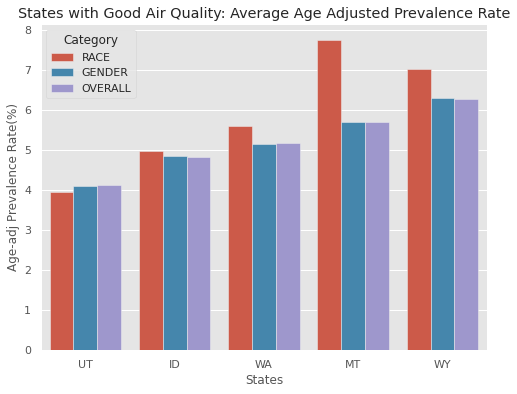

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(x="States", y="Age-adj Prevalence Rate(%)", hue="Category", data= good_air_copd.rename(columns = {'LocationAbbr': 'States', 'DataValue':'Age-adj Prevalence Rate(%)','StratificationCategoryID1':'Category'}).sort_values(by = 'Age-adj Prevalence Rate(%)'));
plt.title('States with Good Air Quality: Average Age Adjusted Prevalence Rate');

**Trend**

These two bar plots each compare age adjusted prevalence rate of COPD in states with good and bad air quality. We could observe that states with bad air quality have higher age adjusted prevalence rate of COPD compared to that of states with good air quality. For instance, COPD rate in states with bad air quality ranges from 6% to 14%, while that of in good air quality states ranges from 4% to 7.8%. 

**Data cleaning**

As stated in the research question, we defined bad air quality as ozone concentration greater than 80ppb and PM 2.5 concentration greater than 35.4μg/m3. However, since ozone & pm2.5 table for this visualization only contained 5M rows each, the data was not comprehensive enough to allow strict classification of good and bad air quality. Thus, we took the yearly average ozone/pm2.5 concentration by each state and defined five bad/good air quality states as those with highest/lowest ozone and pm2.5 concentration, respectively. 

**Relevance**

This is relevant to our research question regarding the relationship between air pollutant and age adjusted prevalence rate of COPD. The visualization clearly shows that states with bad air quality have higher COPD rate. 


https://www.census.gov/newsroom/releases/archives/2010_census/cb11-cn185.html

https://www.scientificamerican.com/article/past-racist-redlining-practices-increased-climate-burden-on-minority-neighborhoods/

https://en.wikipedia.org/wiki/List_of_U.S._states_by_non-Hispanic_white_population

https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population

Will further examine 'climate burden on minority neighborhoods'

## Data Visualization 5

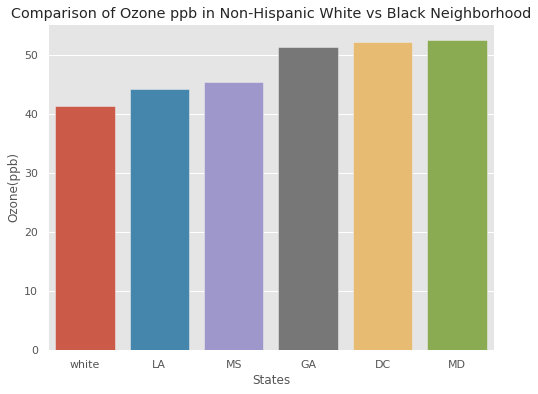

In [50]:
# minority = ['NY','FL','TX','GA','CA','NC','IL','MD','VA','OH']
minority = ['VI','DC','MS','LA','GA','MD']
# white = ['ME','VT','WV','NH','ND','IA','MT','KY','WY','SD']
white = ['ME','VT','WV','NH','ND']

minority_ozone = ozone[ozone['stateAbbr'].isin(minority)][['stateAbbr','ds_o3_pred']].groupby('stateAbbr').mean().reset_index()
white_ozone = ozone[ozone['stateAbbr'].isin(white)][['year','ds_o3_pred']].groupby('year').mean().reset_index().rename(columns = {'year':'stateAbbr'})
white_ozone['stateAbbr'] = white_ozone['stateAbbr'].replace({2011:'white'})
white_ozone = white_ozone[['stateAbbr','ds_o3_pred']].groupby('stateAbbr').mean().reset_index()
ozone_neigh = pd.concat([minority_ozone, white_ozone])

#bar plot comparing white and black neighborhoods
plt.figure(figsize=(8, 6))
sns.barplot(x="States", y="Ozone(ppb)", data=ozone_neigh.rename(columns = {'stateAbbr':'States','ds_o3_pred':'Ozone(ppb)'}).sort_values(by = 'Ozone(ppb)'));
plt.title('Comparison of Ozone ppb in Non-Hispanic White vs Black Neighborhood');

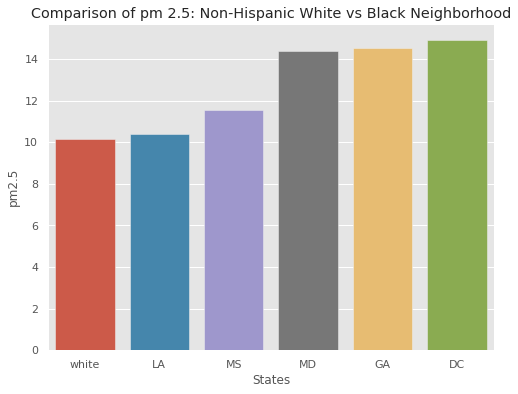

In [51]:
minority_pmcon = pmcon[pmcon['stateAbbr'].isin(minority)][['stateAbbr','ds_pm_pred']].groupby('stateAbbr').mean().reset_index()
white_pmcon = pmcon[pmcon['stateAbbr'].isin(white)][['year','ds_pm_pred']].groupby('year').mean().reset_index().rename(columns = {'year':'stateAbbr'})
white_pmcon['stateAbbr'] = white_pmcon['stateAbbr'].replace({2011:'white'})
white_pmcon = white_pmcon[['stateAbbr','ds_pm_pred']].groupby('stateAbbr').mean().reset_index()
ozone_neigh = pd.concat([minority_pmcon, white_pmcon])

#bar plot comparing white and black neighborhoods
plt.figure(figsize=(8, 6))
sns.barplot(x="States", y="pm2.5", data=ozone_neigh.rename(columns = {'stateAbbr':'States','ds_pm_pred':'pm2.5'}).sort_values(by = 'pm2.5'));
plt.title('Comparison of pm 2.5: Non-Hispanic White vs Black Neighborhood');

**Trend**

These two bar plots each compare ozone ppb and pm2.5 concentration in non-hispanic white and Black neighborhoods (top five states with highest non-hispanic/black population, according to census data). Here, we could observe that both ozone ppb and pm2.5 concentration in white neighborhood are relatively lower than that of in Black neighborhood. This trend may suggest that the climate burden exists in minority neighborhood. This may also imply that since people of color are easily exposed to air pollutants, they are more susceptible to health consequences.

**Data cleaning**

Due to memory shortage, I only took 5 million rows for each ozone and pm 2.5 data. This may have affected data coverage thus harm credibility of the data, since it only contained a portion of 2011 data. 

**Relevance**

This is relevant to our research question regarding the relationship between geographical location, race, and COPD prevalence. Starting from here, we can further examine if most black populated states have a higher chance of getting diagnosed with COPD. From the visualization, we have identified how racial composition differs by states and how these states have different levels of air pollutant. 


In [52]:
age_data =pd.read_csv('/content/drive/MyDrive/Data C102 final project/data/nst-est2019-01.csv', skiprows=3)[5:55]

In [53]:
age_data.columns

Index(['Unnamed: 0', 'Census', 'Estimates Base', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [54]:
age_data = age_data.rename(columns={'Unnamed: 0':'State'})

In [55]:
age_data['State'] = age_data['State'].str.replace('.','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [56]:
age_data.head()

,State,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
5,Alabama,"4,779,736","4,780,125","4,785,437","4,799,069","4,815,588","4,830,081","4,841,799","4,852,347","4,863,525","4,874,486","4,887,681","4,903,185"
6,Alaska,"710,231","710,249","713,910","722,128","730,443","737,068","736,283","737,498","741,456","739,700","735,139","731,545"
7,Arizona,"6,392,017","6,392,288","6,407,172","6,472,643","6,554,978","6,632,764","6,730,413","6,829,676","6,941,072","7,044,008","7,158,024","7,278,717"
8,Arkansas,"2,915,918","2,916,031","2,921,964","2,940,667","2,952,164","2,959,400","2,967,392","2,978,048","2,989,918","3,001,345","3,009,733","3,017,804"
9,California,"37,253,956","37,254,519","37,319,502","37,638,369","37,948,800","38,260,787","38,596,972","38,918,045","39,167,117","39,358,497","39,461,588","39,512,223"


In [57]:
state_ab = pd.read_csv('/content/drive/MyDrive/Data C102 final project/data/state_ab.csv')

In [58]:
state_ab.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [59]:
age_data = age_data.merge(state_ab, how='inner', left_on='State', right_on='State').drop(columns=['Abbrev'])
age_data['Census'] = age_data['Census'].str.replace(',', '').astype(int)

In [60]:
fig_age = go.Figure(data=go.Choropleth(
    locations= age_data['Code'], 
    z = age_data['Census'], 
    locationmode = 'USA-states', 
    colorscale = 'Viridis',
    colorbar_title = "census age",
    
))
fig.update_layout(
    title_text = 'Census age by States',
    geo_scope='usa',
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()

In [61]:
age_data.sort_values('Census', ascending=False).head()

,State,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Code
4,California,37253956,"37,254,519","37,319,502","37,638,369","37,948,800","38,260,787","38,596,972","38,918,045","39,167,117","39,358,497","39,461,588","39,512,223",CA
43,Texas,25145561,"25,146,091","25,241,971","25,645,629","26,084,481","26,480,266","26,964,333","27,470,056","27,914,410","28,295,273","28,628,666","28,995,881",TX
32,New York,19378102,"19,378,144","19,399,878","19,499,241","19,572,932","19,624,447","19,651,049","19,654,666","19,633,428","19,589,572","19,530,351","19,453,561",NY
9,Florida,18801310,"18,804,564","18,845,537","19,053,237","19,297,822","19,545,621","19,845,911","20,209,042","20,613,477","20,963,613","21,244,317","21,477,737",FL
13,Illinois,12830632,"12,831,572","12,840,503","12,867,454","12,882,510","12,895,129","12,884,493","12,858,913","12,820,527","12,778,828","12,723,071","12,671,821",IL


# Research Question 1: Does bad air quality increase the age-adjusted prevalence of COPD?

## Greenhouse gas emission dataset (confounding)

In [62]:
greenhouse = pd.read_excel("/content/drive/MyDrive/Data C102 final project/data/flight.xls", sheet_name='2011')
index = greenhouse.iloc[5]
index_dict = dict()
for i in range(len(index)):
  index_dict[greenhouse.columns[i]] = index[i]
index_dict
greenhouse = greenhouse.rename(columns=index_dict)
greenhouse = greenhouse.dropna()
greenhouse = greenhouse[1:]
greenhouse.head()

,REPORTING YEAR,FACILITY NAME,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY NAME,COUNTY NAME,STATE,ZIP CODE,PARENT COMPANIES,GHG QUANTITY (METRIC TONS CO2e),SUBPARTS
6,2011,#540 BONANZA CREEK ENERGY - DENVER BASIN,1000355,"410 17th Street, Suite 1500",39.74431,-104.98858,Denver,DENVER COUNTY,CO,80202,"BONANZA CREEK ENERGY, INC (100%)",17728,W
7,2011,121 REGIONAL DISPOSAL FACILITY,1004377,3820 SAM RAYBURN HIGHWAY,33.29857,-96.53586,MELISSA,COLLIN COUNTY,TX,75454,North Texas Municipal Water District (100%),194000,HH
8,2011,15-18565/15-18662,1010040,4200 S. Hwy 15,37.219099,-83.156046,Hazard,PERRY COUNTY,KY,40701,TECO Coal Corp (100%),390394,FF
9,2011,15-19015,1010085,1845 S. KY HWY 15,37.236617,-83.18126,Hazard,PERRY,KY,41701,TECO Coal Corporation (100%),64665,FF
10,2011,220 Gulf Coast,1009263,701 Cedar Lake Blvd,35.56719,-97.49827,Oklahoma City,OKLAHOMA COUNTY,OK,73114,"CHAPARRAL ENERGY, INC (100%)",84923,W


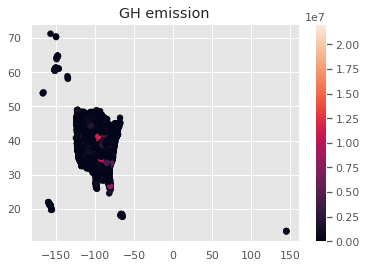

In [63]:
def plot_long_lat(df, col_name, title):
  plt.scatter(x=df['LONGITUDE'], y=df['LATITUDE'], c= df[col_name])
  plt.title(title)
  plt.colorbar()
  plt.show();

plot_long_lat(greenhouse, "GHG QUANTITY (METRIC TONS CO2e)", "GH emission")

In [64]:
is_out_of_lat = (greenhouse["LATITUDE"] > 50) | (greenhouse["LATITUDE"] < 20)
is_out_of_long = (greenhouse["LONGITUDE"] < -150) | (greenhouse["LONGITUDE"] > -50)
is_out_of_latlong = is_out_of_lat| is_out_of_long
greenhouse[is_out_of_latlong]['STATE'].value_counts()

AK    36
PR    27
HI    27
VI     4
GU     3
Name: STATE, dtype: int64

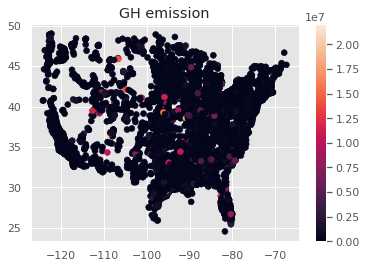

In [65]:
is_known_state = (greenhouse['STATE'] == 'PR') | (greenhouse['STATE'] == 'AK') | (greenhouse['STATE'] == 'HI') | (greenhouse['STATE'] == 'VI') | (greenhouse['STATE'] == 'GU')
is_mainland = ~(is_out_of_latlong | is_known_state)
greenhouse_mainland = greenhouse[is_mainland]
plot_long_lat(greenhouse_mainland, "GHG QUANTITY (METRIC TONS CO2e)", "GH emission")

In [66]:
states = ('PR', 'AK', 'HI', 'VI', 'GU')
pmcon_p = pmcon[['year',"stateAbbr","ds_pm_pred"]].groupby(['year',"stateAbbr"]).mean().reset_index()
ozone_p = ozone[['year',"stateAbbr","ds_o3_pred"]].groupby(['year',"stateAbbr"]).mean().reset_index()

merged_causal = pd.merge(pmcon_p,ozone_p, on = ['year',"stateAbbr"], how = 'inner')

for i in merged_causal['stateAbbr']:
  if i in states:
    print(i)

intersection = set(greenhouse_mainland['STATE']).intersection(set(states))
intersection

set()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.



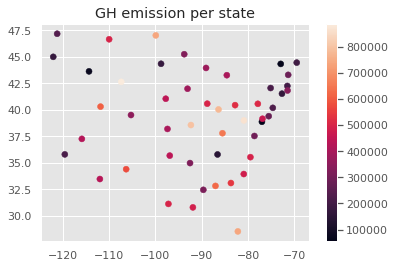

,STATE,GHG QUANTITY
0,AL,624316.285714
1,AR,323823.635135
2,AZ,431255.650602
3,CA,217694.858921
4,CO,353979.954023


In [67]:
greenhouse_mainland = greenhouse_mainland.groupby("STATE").mean().drop(columns=['ZIP CODE', 'GHGRP ID']).rename(columns={'GHG QUANTITY (METRIC TONS CO2e)': 'GHG QUANTITY'})
plot_long_lat(greenhouse_mainland, "GHG QUANTITY", "GH emission per state")
greenhouse_mainland = greenhouse_mainland["GHG QUANTITY"].reset_index()
greenhouse_mainland.head()

In [68]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}


states_reverse = dict(zip(states.values(), states.keys()))
states_reverse = {k:v for k,v in states_reverse.items()}
states_reverse

{'Alabama': 'AL',
 'Alaska': 'AK',
 'American Samoa': 'AS',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Guam': 'GU',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'National': 'NA',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Northern Mariana Islands': 'MP',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Puerto Rico': 'PR',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 

## wildfire dataset (Confounding Variable)

In [69]:
wildfire = pd.read_csv("/content/drive/MyDrive/Data C102 final project/data/wildfire.csv")
wildfire.head()
#len(wildfire)

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


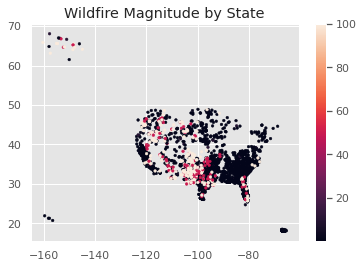

In [70]:
wildfire_eda = wildfire[['state',"disc_pre_year","fire_mag",'latitude',"longitude"]][wildfire['disc_pre_year'] == 2011]
wildfire_eda.head()
plt.scatter(x=wildfire_eda['longitude'], y=wildfire_eda['latitude'], c= wildfire_eda['fire_mag'], s= 7);
plt.title("Wildfire Magnitude by State")
plt.colorbar()
plt.show()

In [71]:
#https://www.kaggle.com/datasets/capcloudcoder/us-wildfire-data-plus-other-attributes?select=Wildfire_att_description.txt
# extract meaningful columns
fire_columns = ['state',"disc_pre_year","fire_mag"]
wildfire_n = wildfire[fire_columns][wildfire['disc_pre_year'] == 2011]
wildfire_df = wildfire_n.groupby('state',as_index = False).agg({'fire_mag': np.mean, "disc_pre_year": 'count'}).rename(columns = {'disc_pre_year':"wildfire_occurences"}).fillna(0)
wildfire_df.head()

#depending on the fire magnitude/ fire size and number of occurences the airquality will differ

,state,fire_mag,wildfire_occurences
0,AK,61.800000,23
1,AL,0.642857,77
2,AR,0.454762,126
3,AZ,41.358000,50
4,CA,5.285427,199


## Smoking Dataset (confounding variable)

In [72]:
#https://ghdx.healthdata.org/record/ihme-data/united-states-smoking-prevalence-county-1996-2012
#dataset contains smoking prevalance in US counties
smoking_temp = pd.read_csv('/content/drive/MyDrive/Data C102 final project/data/IHME_US_COUNTY_TOTAL_AND_DAILY_SMOKING_PREVALENCE_1996_2012.csv')
smoking_temp = smoking_temp[smoking_temp['year']==2011]
smoking_temp = smoking_temp.groupby('state').mean().reset_index()
smoking_temp = smoking_temp[['state',"total_mean"]]
smoking_temp = smoking_temp.rename(columns={"total_mean":"smoking_prevalance"})
#smoking_temp.describe()
copd_smoking = copd[copd['Question']=='Prevalence of chronic obstructive pulmonary disease among adults >= 18']
#copd_question.head()
copd_question_temp = copd_smoking.merge(smoking_temp, left_on = "LocationDesc",right_on = "state")
copd_question_temp.head()


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,state,smoking_prevalance
0,2016,2016,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Crude Prevalence,7.0,...,Race/Ethnicity,"Other, non-Hispanic",2,COPD,COPD2_0,CRDPREV,RACE,OTH,Alaska,27.149722
1,2018,2018,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,5.1,...,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM,Alaska,27.149722
2,2015,2015,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Crude Prevalence,4.9,...,Race/Ethnicity,"Other, non-Hispanic",2,COPD,COPD2_0,CRDPREV,RACE,OTH,Alaska,27.149722
3,2012,2012,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.0,...,Gender,Female,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENF,Alaska,27.149722
4,2011,2011,AK,Alaska,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,%,Age-adjusted Prevalence,6.8,...,Gender,Male,2,COPD,COPD2_0,AGEADJPREV,GENDER,GENM,Alaska,27.149722


In [73]:
smoking_temp = pd.read_csv('/content/drive/MyDrive/Data C102 final project/data/IHME_US_COUNTY_TOTAL_AND_DAILY_SMOKING_PREVALENCE_1996_2012.csv')
smoking_temp = smoking_temp[smoking_temp['year']==2011]
smoking_temp

,state,county,sex,year,total_mean,total_lb,total_ub,daily_mean,daily_lb,daily_ub
45,National,NaN,Males,2011,22.88,22.61,23.25,16.08,15.86,16.41
46,National,NaN,Females,2011,18.40,18.18,18.73,13.34,13.17,13.61
47,National,NaN,Both,2011,20.60,20.36,20.95,14.68,14.50,14.99
96,Alabama,NaN,Males,2011,27.64,26.87,28.47,20.27,19.65,20.98
97,Alabama,NaN,Females,2011,21.60,20.97,22.34,16.24,15.74,16.87
...,...,...,...,...,...,...,...,...,...,...
162073,Wyoming,Washakie County,Females,2011,20.70,16.74,25.51,15.47,12.33,19.08
162074,Wyoming,Washakie County,Both,2011,22.97,19.18,27.61,17.11,13.99,20.62
162123,Wyoming,Weston County,Males,2011,28.54,24.04,33.43,21.69,17.98,26.15
162124,Wyoming,Weston County,Females,2011,23.66,18.60,29.36,18.27,14.35,23.29


In [74]:
copd_causal = copd_question_temp[copd_question_temp["DataValueType"] == "Age-adjusted Prevalence"]
copd_causal = copd_causal[["YearEnd",'LocationAbbr','DataValue',"smoking_prevalance"]]
copd_causal = copd_causal[copd_causal['YearEnd']==2011]
copd_causal = copd_causal.groupby("LocationAbbr").mean().reset_index()
copd_causal.head()

,LocationAbbr,YearEnd,DataValue,smoking_prevalance
0,AK,2011.0,7.283333,27.149722
1,AL,2011.0,9.850000,26.388480
2,AR,2011.0,8.250000,28.034737
3,AZ,2011.0,4.660000,23.424375
4,CA,2011.0,5.225000,18.438870


In [75]:
#pmcon & ozone only contains year 2011
pmcon_p = pmcon[["stateAbbr","ds_pm_pred"]].groupby("stateAbbr").mean().reset_index()
ozone_p = ozone[ozone['year']==2011][["stateAbbr","ds_o3_pred"]].groupby("stateAbbr").mean().reset_index()


#merge dataset
merged_df = copd_causal.merge(pmcon_p,left_on="LocationAbbr",right_on = "stateAbbr")
merged_df = merged_df.merge(ozone_p,on = "stateAbbr")
merged_df = merged_df.merge(greenhouse_mainland, left_on='stateAbbr', right_on='STATE')
merged_df = merged_df.merge(wildfire_df, left_on = "stateAbbr",right_on = 'state', how = 'left')
merged_df.head()

,LocationAbbr,YearEnd,DataValue,smoking_prevalance,stateAbbr,ds_pm_pred,ds_o3_pred,STATE,GHG QUANTITY,state,fire_mag,wildfire_occurences
0,AL,2011.0,9.850,26.388480,AL,13.307682,46.963791,AL,624316.285714,AL,0.642857,77.0
1,AR,2011.0,8.250,28.034737,AR,13.171029,44.804786,AR,323823.635135,AR,0.454762,126.0
2,AZ,2011.0,4.660,23.424375,AZ,8.446873,57.935195,AZ,431255.650602,AZ,41.358000,50.0
3,CA,2011.0,5.225,18.438870,CA,9.040498,47.831644,CA,217694.858921,CA,5.285427,199.0
4,CO,2011.0,5.600,20.472131,CO,7.355974,54.878342,CO,353979.954023,CO,39.457143,21.0


In [76]:
merged_df.describe()

,YearEnd,DataValue,smoking_prevalance,ds_pm_pred,ds_o3_pred,GHG QUANTITY,fire_mag,wildfire_occurences
count,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,41.000000,41.000000
mean,2011.0,6.856917,23.432362,10.708475,46.509551,420576.441291,14.934438,69.609756
std,0.0,1.710817,3.107014,2.833050,5.053754,205271.893835,20.567859,136.196343
min,2011.0,3.600000,16.544444,5.623760,35.766054,60345.181818,0.100000,1.000000
25%,2011.0,5.675000,21.663701,8.368965,43.447290,265757.980349,0.454762,11.000000
50%,2011.0,6.534286,23.226422,10.607452,46.411488,413445.182335,3.793750,28.000000
75%,2011.0,8.175000,25.396641,13.491792,49.723152,514005.328710,23.811765,61.000000
max,2011.0,11.057143,30.279036,14.544801,57.935195,887136.843750,81.100000,839.000000


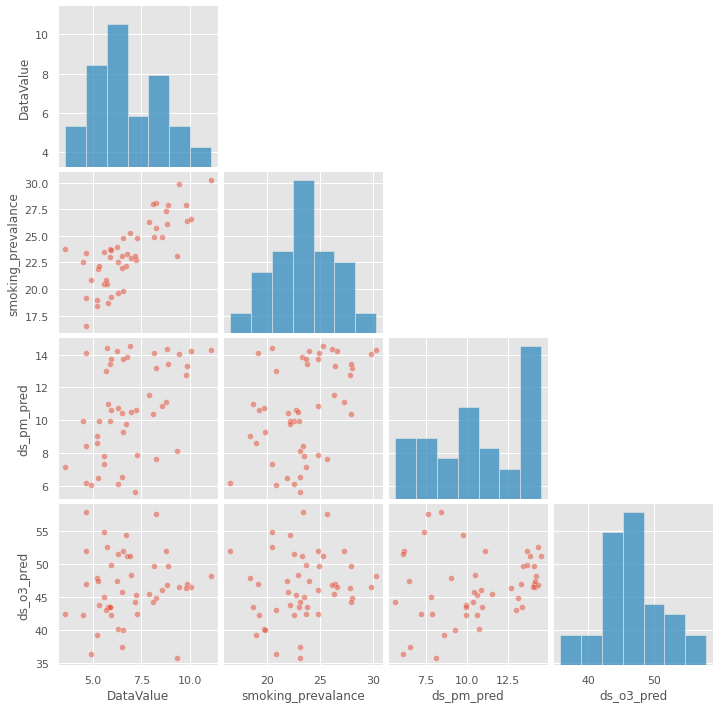

In [77]:
merged_df_temp = merged_df[['DataValue','smoking_prevalance',"ds_pm_pred","ds_o3_pred"]]
fig = sns.pairplot(merged_df_temp,  plot_kws=dict(marker="o", alpha = 0.5))
for i, j in zip(*np.triu_indices_from(fig.axes, 1)):
    fig.axes[i, j].set_visible(False)
plt.show()

- Definite linear relationship between prevalence of COPD and smoking prevalence

## Population Dataset

In [78]:
pop_dens = pd.read_csv('/content/drive/MyDrive/Data C102 final project/data/popdens.csv')
pop_dens = pop_dens.iloc[5:56,:][['NAME',"POPESTIMATE2011"]]
pop_dens['NAME'] = pop_dens['NAME'].map(states_reverse)
pop_dens.head()

,NAME,POPESTIMATE2011
5,AL,4799069
6,AK,722128
7,AZ,6472643
8,AR,2940667
9,CA,37638369


In [79]:
merged_df = merged_df.merge(pop_dens, left_on = "LocationAbbr",right_on = "NAME")
#merged_df = merged_df.drop(columns = ['stateAbbr',"YearEnd","STATE",'state'])
merged_df.head()


,LocationAbbr,YearEnd,DataValue,smoking_prevalance,stateAbbr,ds_pm_pred,ds_o3_pred,STATE,GHG QUANTITY,state,fire_mag,wildfire_occurences,NAME,POPESTIMATE2011
0,AL,2011.0,9.850,26.388480,AL,13.307682,46.963791,AL,624316.285714,AL,0.642857,77.0,AL,4799069
1,AR,2011.0,8.250,28.034737,AR,13.171029,44.804786,AR,323823.635135,AR,0.454762,126.0,AR,2940667
2,AZ,2011.0,4.660,23.424375,AZ,8.446873,57.935195,AZ,431255.650602,AZ,41.358000,50.0,AZ,6472643
3,CA,2011.0,5.225,18.438870,CA,9.040498,47.831644,CA,217694.858921,CA,5.285427,199.0,CA,37638369
4,CO,2011.0,5.600,20.472131,CO,7.355974,54.878342,CO,353979.954023,CO,39.457143,21.0,CO,5121108


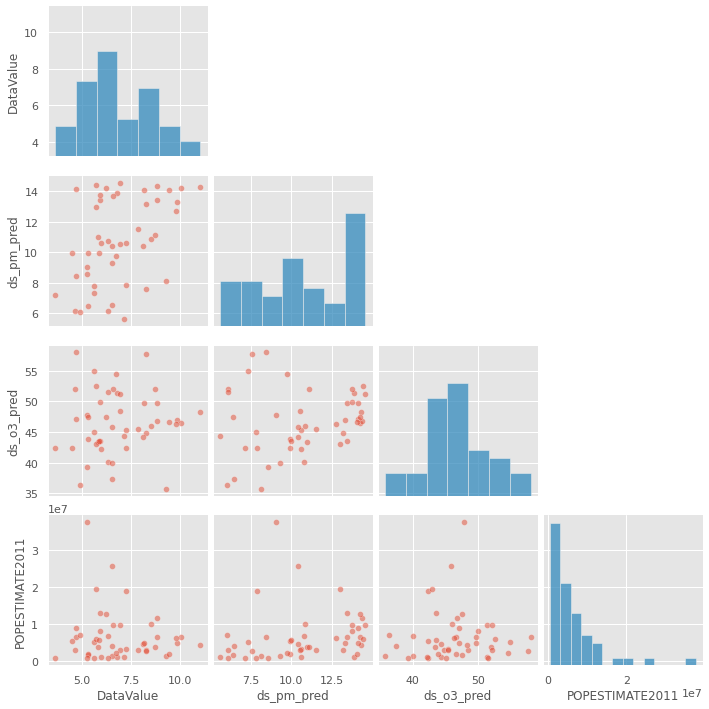

In [80]:
fig = sns.pairplot(merged_df[['DataValue',"ds_pm_pred","ds_o3_pred","POPESTIMATE2011"]],  plot_kws=dict(marker="o", alpha = 0.5))
for i, j in zip(*np.triu_indices_from(fig.axes, 1)):
    fig.axes[i, j].set_visible(False)
plt.show()

Even though we don't observe any linear relationship between population and air quality concentration, we assume that that increasing population density worsens the air quality.

### Data Set preparation for causal inference
1. copd 
  - only contains year 2011
  - filtered out the data which only contains the information of age-adjusted prevalence of COPD among adults greater than 18 years old (question column)

2. ozone & pmcon
  - only contains year 2011
  - filtered out data that only contains the year 2011 and grouped the dataset by state and computed the mean concentration of each state. 
3. greenhouse gas emission, smoking, wildfire, population density
  - contains the info by states in year 2011

4. merged_df
 - merged dataframe of copd, ozone, pmcon, and confouding variables




### Treatment, Outcome, Confounding Variables
- Treatment (“Treatment” in merged_df) : our treatment group 1, it contains 16 states with bad air quality and treatment group 0 contains  our treatment is states with bad/good quality in 2011
- Outcome (“Datavalue” in merged_df) : the prevalence of chronic obstructive pulmonary disease among adults greater than or equal to 18.
- Confounding variables: greenhouse gas emissions, smoking prevalence, number of wildfire occurrences & size of the wildfire, population density of each state


### Unconfoundedness Assumption Holds:
- These confounding variables have direct causal effects on both treatment and the outcome and the treatment itself has an effect on the outcome.
- States with bad quality might have more intense greenhouse gas emission, higher rate of smoking prevalence, more frequent number of wildfire occurrences and larger magnitude of the wildfire. 
- Therefore, the confounding effect of these determinants will cause simple differences in means to be biased. We made an assumption that the treatment and the potential outcomes are conditionally independent given these sets of known confounding variables which also means that we observed all the relevant confounding variables. 
- SUTVA (Stable Unit Treatment Value Assumption)
    - We assume that states with bad air quality do not affect the states with good air quality.
- There are no other additional confounders that have an effect on the treatment and the outcome. 


In [81]:
#going to sort pm and ozone concentration values and set states with bad/good air quality 
merged_df = merged_df.sort_values(by = ['ds_pm_pred', 'ds_o3_pred'], ascending = [False, False])
bad_air_quality_states = merged_df['LocationAbbr'].unique()[:17]
merged_df['treatment'] = [1 if a in bad_air_quality_states else 0 for a in merged_df['LocationAbbr']]

merged_df.head()


,LocationAbbr,YearEnd,DataValue,smoking_prevalance,stateAbbr,ds_pm_pred,ds_o3_pred,STATE,GHG QUANTITY,state,fire_mag,wildfire_occurences,NAME,POPESTIMATE2011,treatment
8,GA,2011.0,6.920000,25.297250,GA,14.544801,51.262334,GA,540721.105590,GA,2.651765,255.0,GA,9802431,1
17,MD,2011.0,5.720000,20.519600,MD,14.389360,52.529497,MD,464201.681818,MD,1.562500,8.0,MD,5839419,1
32,OH,2011.0,8.816667,26.092022,OH,14.349259,46.783096,OH,521912.579545,NaN,NaN,NaN,OH,11544663,1
14,KY,2011.0,11.057143,30.279036,KY,14.267913,48.223442,KY,651955.974194,KY,0.602128,47.0,KY,4369821,1
35,PA,2011.0,6.240000,23.994118,PA,14.195349,47.467128,PA,511369.578431,PA,1.000000,1.0,PA,12745815,1


In [82]:
#Calculate Simple Difference in Observed group mean
sdo = np.mean(merged_df[merged_df['treatment']==1]['DataValue'])-np.mean(merged_df[merged_df['treatment']==0]['DataValue'])
sdo

#hower we can't use the simple difference in observed group means (SDO) to estimate the causal ATE

1.1220843498689819

the SDO is positive, however, we can't use the simple difference in observed group means (SDO) to estimate the causal ATE.

## Unconfoundedness Techniques

In [83]:
merged_df = merged_df.fillna(0)
merged_df.describe()

,YearEnd,DataValue,smoking_prevalance,ds_pm_pred,ds_o3_pred,GHG QUANTITY,fire_mag,wildfire_occurences,POPESTIMATE2011,treatment
count,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,4.800000e+01,48.000000
mean,2011.0,6.856917,23.432362,10.708475,46.509551,420576.441291,12.756499,59.458333,6.434075e+06,0.354167
std,0.0,1.710817,3.107014,2.833050,5.053754,205271.893835,19.708002,128.074938,6.988070e+06,0.483321
min,2011.0,3.600000,16.544444,5.623760,35.766054,60345.181818,0.000000,0.000000,5.672990e+05,0.000000
25%,2011.0,5.675000,21.663701,8.368965,43.447290,265757.980349,0.264942,7.000000,2.024413e+06,0.000000
50%,2011.0,6.534286,23.226422,10.607452,46.411488,413445.182335,1.809821,24.500000,4.623810e+06,0.000000
75%,2011.0,8.175000,25.396641,13.491792,49.723152,514005.328710,17.320048,50.000000,7.145259e+06,1.000000
max,2011.0,11.057143,30.279036,14.544801,57.935195,887136.843750,81.100000,839.000000,3.763837e+07,1.000000


In [84]:
z = merged_df['treatment'].array
y = merged_df['DataValue'].array
x = merged_df[['smoking_prevalance',"GHG QUANTITY","fire_mag","wildfire_occurences","POPESTIMATE2011"]].to_numpy()

### Outcome Regression

Suppose we fit a linear model of the following form:

Prevalance = τ * Z + a* Prevalance of Smoking + b * Greenhouse Gas emission + c * Magnitude of Fire + d * Occurrences of wildfire + e * Population density of 2011

Under the following assumptions, the estimated coefficient of treatment from OLs, predicted τ, will be an unbiased estimate of the ATE:

1. Assume unconfoundedness given this set of 6 variables.
2. Assume this new linear model correctly describes the interaction between the variables.

In [85]:
#code extracted from DATA102 LAB
def fit_OLS_model(df, target_variable, explanatory_variables, intercept = False):
    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)
    
    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)
def mean_squared_error(true_vals, predicted_vals):
    return np.mean((true_vals - predicted_vals) ** 2)

In [86]:
linear_model = fit_OLS_model(merged_df, 'DataValue',['treatment','smoking_prevalance',"GHG QUANTITY","fire_mag","wildfire_occurences","POPESTIMATE2011"])
print(linear_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              DataValue   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              274.2
Date:                Tue, 10 May 2022   Prob (F-statistic):                    5.01e-32
Time:                        06:14:27   Log-Likelihood:                         -73.306
No. Observations:                  48   AIC:                                      158.6
Df Residuals:                      42   BIC:                                      169.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### Result
- Summary: Estimated coefficient of treatment from OLS, predicted τ = 0.2028 Confidence Interval at 5% significance level = [-0.661, 1.067]
- Interpretation: The estimated coefficient is close to zero and the confidence interval of it contains negative value, it implies that the estimated effect of the air quality using outcome regression is that the program does not cause people to have higher prevalence of COPD. 
- Uncertainty: We assumed unconfoundedness that there are only 6 confounding variables that cause both treatment and outcome. There might be missing confounders not taken care of by the data and the model which lead us to this decision. Also, it is not clear that confounding variables would all have a linear effect on the prevalence of COPD. This leads us to an uncertainty that our linear model does not model any interactions between the variables. 


#### Inverse Propsensity Weighting

In [87]:
z = merged_df['treatment'].array
y = merged_df['DataValue'].array
x = merged_df[['smoking_prevalance',"GHG QUANTITY","fire_mag","wildfire_occurences","POPESTIMATE2011"]].to_numpy()

In [88]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(penalty="none", max_iter=200, random_state=0)
lr.fit(x,z)

p_score = lr.predict_proba(x)[:,1]

merged_df['pscore'] = p_score
merged_df.head()

,LocationAbbr,YearEnd,DataValue,smoking_prevalance,stateAbbr,ds_pm_pred,ds_o3_pred,STATE,GHG QUANTITY,state,fire_mag,wildfire_occurences,NAME,POPESTIMATE2011,treatment,pscore
8,GA,2011.0,6.920000,25.297250,GA,14.544801,51.262334,GA,540721.105590,GA,2.651765,255.0,GA,9802431,1,0.391194
17,MD,2011.0,5.720000,20.519600,MD,14.389360,52.529497,MD,464201.681818,MD,1.562500,8.0,MD,5839419,1,0.402565
32,OH,2011.0,8.816667,26.092022,OH,14.349259,46.783096,OH,521912.579545,0,0.000000,0.0,OH,11544663,1,0.397783
14,KY,2011.0,11.057143,30.279036,KY,14.267913,48.223442,KY,651955.974194,KY,0.602128,47.0,KY,4369821,1,0.359645
35,PA,2011.0,6.240000,23.994118,PA,14.195349,47.467128,PA,511369.578431,PA,1.000000,1.0,PA,12745815,1,0.401809


pscore_treatment =1: 0.4057086536746557
pscore_treatment =0: 0.4184967807310287


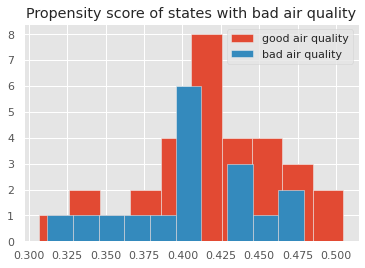

In [89]:
plt.hist(merged_df[merged_df['treatment']==0]['pscore'], label = 'good air quality');
plt.hist(merged_df[merged_df['treatment']==1]['pscore'], label = "bad air quality");
plt.title("Propensity score of states with bad air quality");
print("pscore_treatment =1:", np.mean(merged_df[merged_df['treatment']==1]['pscore']))
print("pscore_treatment =0:", np.mean(merged_df[merged_df['treatment']==0]['pscore']))
plt.legend();

It seems like the propensity score for states with good air quality has a 

2. calculate IPW estimate for the ATE

In [90]:
reweighted_treated = np.sum(merged_df[merged_df['treatment']==1]['DataValue']/merged_df[merged_df['treatment']==1]['pscore'])/len(merged_df)
reweighted_control = np.sum(merged_df[merged_df['treatment']==0]['DataValue']/merged_df[merged_df['treatment']==1]['pscore'])/len(merged_df)
ipw_estimate = reweighted_treated-reweighted_control
ipw_estimate

6.824300773955556

#### Results
- Interpretation: If we assume that the outcome, age-adjusted prevalence of COPD among adults, is unconfounded given the variables and the propensity score is a good model of probability of states that has a bad air quality given the prevalence of smoking, greenhouse gas emission, magnitude of fire, occurrences of wildfire and the population density of each states , then the estimated effect of bad air quality is that the bad air quality causes people to have 6.8% more prevalence of being diagnosed to COPD than people who residence in good air quality.
- Uncertainty: Similarly as outcome regression, there might be missing confounders not taken into account by the data.  The propensity score is calculated based on logistic regression, its calculated value could be misinterpreted which leads to uncertainty in our IPW estimate. When we observe the histogram of propensity scores of states with bad/good air quality, it seems like there are no big differences between the distribution of each treatment. It is questionable whether the confounding variables that we have used to model the treatment can differentiate among the treatment groups.


# Research Question 2: Can we predict whether people have chronic diseases (COPD) from geographical (location), race/ethnicity trends?

### Data Preparation for GLM

Data Preparation for GLM

In [91]:
copd = pd.read_csv("/content/drive/MyDrive/Data C102 final project/data/U.S._Chronic_Disease_Indicators__Chronic_Obstructive_Pulmonary_Disease.csv")
#dropped meaningless columns
na_columns = ["Response","StratificationCategory2","Stratification2","StratificationCategory3","Stratification3","ResponseID","StratificationCategoryID2","StratificationID2","StratificationCategoryID3","StratificationID3"]
copd = copd.drop(na_columns, axis=1)

In [92]:
copd_question = copd[copd['Question']=='Prevalence of chronic obstructive pulmonary disease among adults >= 18']
copd_question_ageadj = copd_question[copd_question['DataValueTypeID'] == 'AGEADJPREV']

In [93]:
longlat = pd.read_csv('https://raw.githubusercontent.com/google/dspl/master/samples/google/canonical/states.csv')
longlat.loc[52] = ['GU', 13.444304, 144.793732, 'Guam']
longlat

,state,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California
5,CO,39.550051,-105.782067,Colorado
6,CT,41.603221,-73.087749,Connecticut
7,DC,38.905985,-77.033418,District of Columbia
8,DE,38.910832,-75.527670,Delaware
9,FL,27.664827,-81.515754,Florida


In [94]:
copd_rq2 = copd_question_ageadj[["LocationAbbr", 'DataValue', 'Stratification1']][copd_question_ageadj['StratificationCategory1'] == 'Race/Ethnicity']
copd_rq2 = copd_rq2.dropna()
one_hot = pd.get_dummies(copd_rq2['Stratification1'])
copd_rq2 = copd_rq2.join(one_hot)
copd_rq2 = copd_rq2.rename(columns={'Black, non-Hispanic':"Black", "Multiracial, non-Hispanic" : "Multiracial", "Other, non-Hispanic": "Other", "White, non-Hispanic":"White"})
copd_rq2['DataValue'] = copd_rq2['DataValue'].astype(float)
copd_rq2['likely'] = 1*(copd_rq2['DataValue'] > 6.4)
copd_rq2 = copd_rq2.reset_index().drop(columns=['Stratification1', 'DataValue','index'])
copd_rq2 = copd_rq2.merge(longlat, left_on = 'LocationAbbr', right_on = 'state').drop(columns=['state'])
copd_rq2

,LocationAbbr,Black,Hispanic,Multiracial,Other,White,likely,latitude,longitude,name
0,AK,0,0,0,1,0,1,63.588753,-154.493062,Alaska
1,AK,0,0,0,0,1,0,63.588753,-154.493062,Alaska
2,AK,0,0,0,0,1,0,63.588753,-154.493062,Alaska
3,AK,0,0,1,0,0,1,63.588753,-154.493062,Alaska
4,AK,0,0,0,0,1,0,63.588753,-154.493062,Alaska
...,...,...,...,...,...,...,...,...,...,...
1570,WY,0,1,0,0,0,1,43.075968,-107.290284,Wyoming
1571,WY,0,1,0,0,0,1,43.075968,-107.290284,Wyoming
1572,WY,0,1,0,0,0,0,43.075968,-107.290284,Wyoming
1573,WY,0,1,0,0,0,1,43.075968,-107.290284,Wyoming


In [95]:
copd_rq2 = copd_rq2.rename(columns={'likely':'y'})

##GLM: Bayesian Logistic Regression Model

In [ ]:
#bayesian
import pymc3 as pm

with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula(
        "y ~ latitude + longitude + Black + Hispanic + Multiracial + Other + White", data=copd_rq2, family=pm.glm.families.Binomial()
    )
    trace = pm.sample(1000, init='adapt_diag', target_accept = 0.95, cores=2, random_seed=33)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [White, Other, Multiracial, Hispanic, Black, longitude, latitude, Intercept]


In [ ]:
import arviz as az
az.plot_posterior(trace, ['Intercept', 'latitude','longitude','Black','Hispanic','Multiracial','Other','White'], round_to = 3)
plt.show()

In [ ]:

with logistic_model:
  logistic_ppc = pm.sample_posterior_predictive(trace)
  logistic_ppc['y'] = logistic_ppc['y'] + 0.0
  ppc_logistic = az.from_pymc3(trace, posterior_predictive=logistic_ppc)
# Plot PPC samples
fig, ax = plt.subplots(figsize=(12, 6))
az.plot_ppc(ppc_logistic, ax=ax)
plt.xlabel('y = Likelihood of Having COPD')

plt.title('Bayesian Posterior Predictive Check')
plt.show()

In [ ]:
az.summary(trace)

In [ ]:
az.hdi(trace, hdi_prob=0.95)

### Results
**– Summarize and interpret the results from your models.**

Looking at the PPC diagram below, It seems like our posterior predictive is really close to our actual values of the data; however, it also seems like that the model has overfit to the data as all the values are within the posterior predictive. 

Looking at the posterior distributions of features, individuals who are multiracial are most likely to have COPD ceteris paribus. Moreover, it seems like the distributions of latitude and longitude are fairly normal at around 0, with small values of standard deviations. However, the other variables are very skewed and have very large values of standard deviations. 


**– Estimate any uncertainty in your GLM predictions, providing clear quantitative statements of the uncertainty in plain English.**

The numbers in the diagram below are 95% credible intervals for each of the features of the model; 95% of the posterior distribution is in the credible intervals for each of the features below. So, for example, in the diagram above, we can see the posterior distributions of the feature “intercept”. Now looking at the diagram below, we can see that the 95% credible interval for “intercept” is [-916.2, -76.01]. What this means is that about 95% of the posterior distribution for “intercept” is between the [-916.2, -76.01]. 

##GLM: Frequentist Logistic Regression Model

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

freq_model = smf.glm("y ~ latitude + longitude + Black + Hispanic + Multiracial + Other + White", data = copd_rq2, family = sm.families.Binomial())

freq_res = freq_model.fit(  )
print(freq_res.summary())

### Results
**– Summarize and interpret the results from your models.**

From the frequentist model, we were able to see that hispanic and white individuals are less likely to have COPD compared to other races, ceteris paribus (hispanic and white's coefficients are negative). Moreover, as the state's latitude is lower and its longitude is higher, individuals in that state are more likely than individuals in other states. The intercept of the model is 0.7761, which means that the model will provide an output of 0.7761, if all other variables are 0; however, it is not possible for all the variables to be 0 as all of the data in our dataset is one of the five races. Moreover, a longitude of 0 and latitude of 0 would indicate a location in the Atlantic Ocean, which is obviously not included in our data.

Moreover, the p-values of latitude, longitude, Black, and Other are greater than 0.05, meaning that they are not statistically significant at the 5% level. The variables that are statistically significant at the 5% level are Hispanic, Multiracial, and White. 

With the average log-likelihood being about -0.57, which is relatively close to 0, our model may be a good fit for the data. However, the value of pearson chi-squared, 1590, is really high meaning that our model may not be a good fit for the data. 



**– Estimate any uncertainty in your GLM predictions, providing clear quantitative statements of the uncertainty in plain English.**

The numbers in the left two columns in the table are 95% confidence intervals for each of the features. The concept of confidence intervals is that the probability of the true value of the features’ coefficient falling into the interval is about 95%. For example, the confidence interval of the feature “intercept” is [0.185, 1.367]. Thus, the probability of the true coefficient of “intercept” being in the interval of [0.185, 1.367] is 95%.



##Non-Parametric Method: Random Forest

###Data Preparation: merge Longitude/Latitude Data & one-hot encoding

In [ ]:
#import longitude and latitude data
longlat = pd.read_csv('https://raw.githubusercontent.com/google/dspl/master/samples/google/canonical/states.csv')
#Add Guam; source: https://www.latlong.net/place/guam-18392.html
longlat.loc[52] = ['GU', 13.444304, 144.793732, 'Guam']

In [ ]:
#data preparation: one-hot encoding, merge longitude/latitude data with COPD data
copd_rq2 = copd_question_ageadj[["LocationAbbr", 'DataValue', 'Stratification1', 'YearStart']][copd_question_ageadj['StratificationCategory1'] == 'Race/Ethnicity']
copd_rq2 = copd_rq2.dropna()
one_hot = pd.get_dummies(copd_rq2['Stratification1'])
copd_rq2 = copd_rq2.join(one_hot)
copd_rq2 = copd_rq2.rename(columns={'YearStart':'Year','Black, non-Hispanic':"Black", "Multiracial, non-Hispanic" : "Multiracial", "Other, non-Hispanic": "Other", "White, non-Hispanic":"White"})
copd_rq2['DataValue'] = copd_rq2['DataValue'].astype(float)
copd_rq2['likely'] = 1*(copd_rq2['DataValue'] > 6.4)
copd_rq2 = copd_rq2.reset_index().drop(columns=['Stratification1', 'DataValue','index'])
copd_rq2 = copd_rq2.merge(longlat, left_on = 'LocationAbbr', right_on = 'state').drop(columns=['state'])
copd_rq2_NN = copd_rq2.drop(columns=['LocationAbbr', 'name'])
copd_rq2_NN.head()

###Train/Test split & Fitting Random Forest Model

In [ ]:

# Train/Test split & Fitting Random Forest Model
from sklearn.model_selection import train_test_split

train, test = train_test_split(copd_rq2_NN, test_size=.3, random_state=101)
X_cols = ['Year', 'Black', 'Hispanic', 'Multiracial', 'Other', 'White','latitude', 'longitude']
y_col = 'likely'
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(max_features=2)
forest_model.fit(train[X_cols], train[y_col])
train['forest_pred'] = forest_model.predict(train[X_cols])
test['forest_pred'] = forest_model.predict(test[X_cols])


###Error Calculation: RMSE

In [ ]:
train_rmse = np.mean((train["forest_pred"] - train["likely"]) ** 2) ** 0.5
test_rmse = np.mean((test["forest_pred"] - test["likely"]) ** 2) ** 0.5

print("Training set error for random forest:", train_rmse)
print("Test set error for random forest:    ", test_rmse)

###Evaluation: Compute TPR & TNR

In [ ]:
test_trueCOPD = test[test['likely'] == 1]
test_predTrue = test_trueCOPD[test_trueCOPD['forest_pred'] > 0.60]
TPR = len(test_predTrue)/ len(test_trueCOPD)

test_falseCOPD = test[test['likely'] == 0]
test_predFalse = test_falseCOPD[test_falseCOPD['forest_pred'] <= 0.40]
TNR = len(test_predFalse)/ len(test_falseCOPD)

print("Test set True Positive Rate:", TPR)
print("Test set True Negative Rate:    ", TNR)

In [ ]:
train_trueCOPD = train[train['likely'] == 1]
train_predTrue = train_trueCOPD[train_trueCOPD['forest_pred'] > 0.60]
TPR = len(train_predTrue)/ len(train_trueCOPD)

train_falseCOPD = train[train['likely'] == 0]
train_predFalse = train_falseCOPD[train_falseCOPD['forest_pred'] <= 0.40]
TNR = len(train_predFalse)/ len(train_falseCOPD)

print("Train set True Positive Rate:", TPR)
print("Train set True Negative Rate:    ", TNR)

###Visualization of Random Forest Model

In [ ]:
 from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = forest_model.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_cols, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

from IPython.display import Image 
Image(graph.create_png())

###Visualization of a Single Decision Tree

In [ ]:
# Take a closer look into a single decision tree; Limit depth of tree to 3 levels
RF = RandomForestRegressor(n_estimators=20, max_depth = 3)
RF.fit(train[X_cols], train[y_col])
# Extract the small tree
smallTree = RF.estimators_[5]
# Save the tree as a png image
export_graphviz(smallTree, out_file = 'smallTree.dot', feature_names = X_cols, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('smallTree.dot')
Image(graph.create_png())

###Computing Feature Importance

In [ ]:
# Get numerical feature importances
importances = list(forest_model.feature_importances_)
# Sort the feature importances
feature_imp = sorted([(feature, round(importance, 2)) for feature, importance in zip(X_cols, importances)], key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*tup)) for tup in feature_imp];

###Results

**Train/Test Error (RMSE) & Accuracy (TPR/TNR)**

While both training and test set error are relatively low, test set error is slightly greater than training set error. To better understand the prediction, we computed true positive rate and true negative rate for both test and train set. Here, we defined predictions greater than 60% as 'predicting that one has COPD'. Similarly, we defined predictions less than 40% as 'predicting that one does not have COPD'. TPR and TNR of our train set are approximately 99%, while that of our test set are approximately 81%. Overall, our model accuracy is high and our model error is also relatively low. 

**Visualization of a Single Decision Tree**

As shown in the visualization of a single decision tree, the root node first looks at multiracial feature to split the data. Then, its children split after looking into longitude and latitude of the data. For instance, the rightmost branch predicts higher value when multiracial feature is greater than 0.5 and latitude is greater than 23.8. Similarly, when the latitude is less than or equal to 23.8, model predicts lower value. The only states that meet this condition (Guam, Hawaii, and Puerto Rico) are the states with lowest age-adjusted prevalence rate of COPD. This indicates that the model is incorporating geographical locations to accurately predict COPD. 

Although this is a simple random forest model generated to only show a single decision tree, it seems like most of the layers make decisions based on longitude, latitude, multiracial, and year. 

**Computing Feature Importance**

To further examine features and their role in prediction, we computed feature importances. As shown below, longitude is the best predictor of whether or not an individual will be diagnosed with COPD. Then follows latitude, Year, Multiracial, and more. This indicates that geographic location is the best predictor overall. 